In [12]:
# Allows charts to appear in the notebook
%matplotlib inline

# Libraries for analysis
# Scikit-learn 套件 內含 SVM
import pandas as pd
import numpy as np
from sklearn import svm

# Libraries for visuals
# Seaborn 為 功能 強大 的 python 繪圖函式庫，具有簡易使用的特性。
# 安裝 : pip install seaborn
import matplotlib.pyplot as plt
import seaborn as sns; sns.set(font_scale=1.2)

# Read in muffin and cupcake ingredient data
# 修正了檔案路徑錯誤，使用 r'' 表示原始字串
recipes = pd.read_csv(r'C:\Users\sam00\Downloads\recipes_muffins_cupcakes.csv')
recipes.head()


,Type,Flour,Milk,Sugar,Butter,Egg,Baking Powder,Vanilla,Salt
0,Muffin,55,28,3,7,5,2,0,0
1,Muffin,47,24,12,6,9,1,0,0
2,Muffin,47,23,18,6,4,1,0,0
3,Muffin,45,11,17,17,8,1,0,0
4,Muffin,50,25,12,6,5,2,1,0


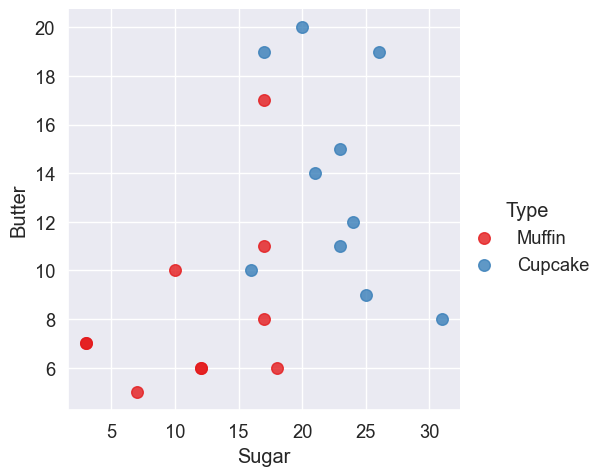

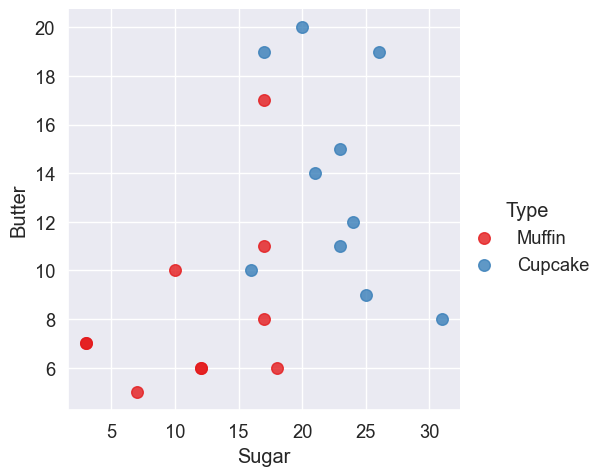

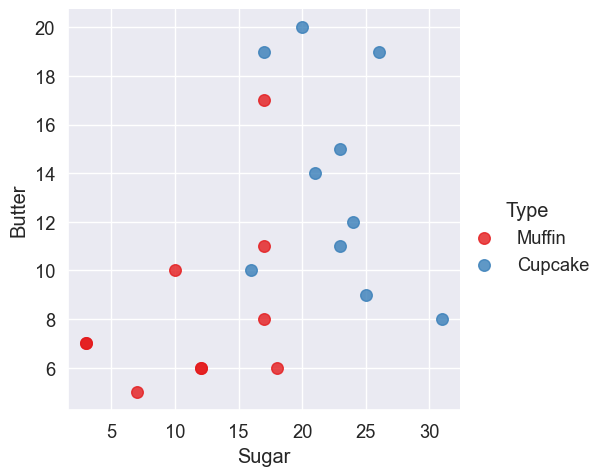

In [18]:
# Plot two ingredients
# Create scatterplot of dataframe
# TypeError: Implot() got multiple values for argument 'data'
# 解決: 改成 x='Sugar', y='Butter'
sns.lmplot(x='Sugar', y='Butter', data=recipes, hue='Type',
           palette='Set1', fit_reg=False, scatter_kws={"s": 70})
plt.show()

In [20]:


# Implot 畫圖, 設定 fit_reg=False 讓 regression line 消失。

# Specify inputs for the model
# sugar_butter = recipes[['Sugar', 'Butter']].as_matrix() # 舊版
sugar_butter = recipes[['Sugar', 'Butter']].to_numpy()
type_label = np.where(recipes['Type'] == 'Muffin', 0, 1)

# Fit the SVM model
# SVC (support vectors classification)
# 核心 (Kernel) 在電腦科學中是管理軟體發出的資料 I/O (輸入與輸出) 要求的電腦程式, 將這些要求轉譯為資料處理的指令並交由中央處理器 (CPU) 及電腦中其他電子元件進行處理。
model = svm.SVC(kernel='linear', C=2**-5)

model.fit(sugar_butter, type_label)


SVC(C=0.03125, kernel='linear')

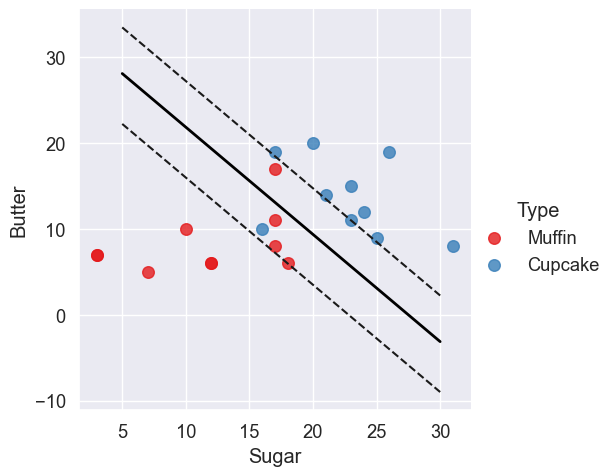

In [22]:
# Get the separating hyperplane
w = model.coef_[0]
a = -w[0] / w[1]
xx = np.linspace(5, 30)
yy = a * xx - (model.intercept_[0] / w[1])

# Plot the parallels to the separating hyperplane
# that pass through the support vectors
b = model.support_vectors_[0]
yy_down = a * xx + (b[1] - a * b[0])

b = model.support_vectors_[-1]
yy_up = a * xx + (b[1] - a * b[0])

# Look at the margins and support vectors
# TypeError: Implot() got multiple values for argument 'data'
# 解決: 改成 x='Sugar', y='Butter'
sns.lmplot(x='Sugar', y='Butter', data=recipes, hue='Type',
           palette='Set1', fit_reg=False, scatter_kws={"s": 70})

# 繪製分離超平面
plt.plot(xx, yy, linewidth=2, color='black')

# 繪製平行於分離超平面的邊界線
plt.plot(xx, yy_down, 'k--')
plt.plot(xx, yy_up, 'k--')

# 繪製支持向量
plt.scatter(model.support_vectors_[:, 0], model.support_vectors_[:, 1],
            s=80, facecolors='none')

# 顯示圖形 (如果需要)
plt.show()


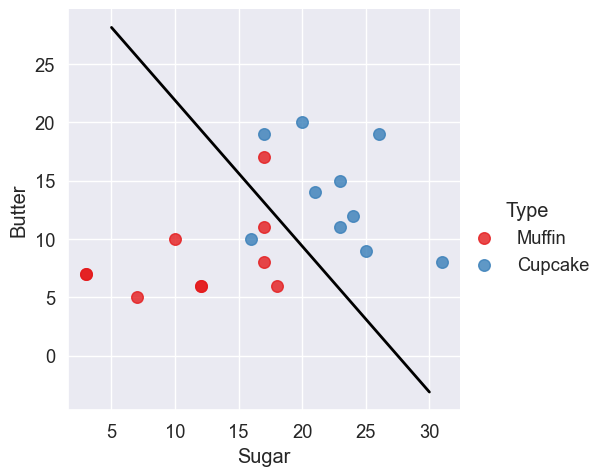

In [24]:
# Plot the hyperplane
# TypeError: Implot() got multiple values for argument 'data'
# 解決: 改成 x='Sugar', y='Butter'
sns.lmplot(x='Sugar', y='Butter', data=recipes, hue='Type',
           palette='Set1', fit_reg=False, scatter_kws={"s": 70})

# 繪製分離超平面
plt.plot(xx, yy, linewidth=2, color="black")

# 顯示圖形 (如果需要)
plt.show()


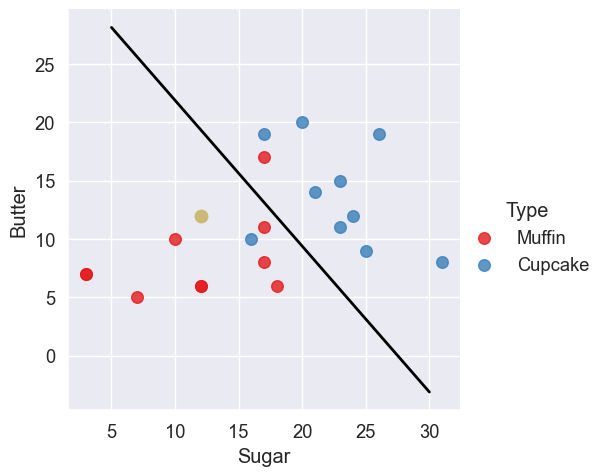

In [26]:
# Plot the point to visually see where the point lies
# TypeError: Implot() got multiple values for argument 'data'
# 解決: 改成 x='Sugar', y='Butter'
sns.lmplot(x='Sugar', y='Butter', data=recipes, hue='Type',
           palette='Set1', fit_reg=False, scatter_kws={"s": 70})

# 繪製分離超平面
plt.plot(xx, yy, linewidth=2, color='black')

# 標記出特定的點 (12, 12)
plt.plot(12, 12, 'yo', markersize='9') # 'yo' 表示黃色的圓形標記

# 顯示圖形 (如果需要)
plt.show()


In [28]:
# Create a function to guess when a recipe is a muffin
# or a cupcake using the SVM model we created
def muffin_or_cupcake(butter, sugar):
    # 使用模型進行預測
    if(model.predict([[butter, sugar]])) == 0:
        print('You\'re looking at a muffin recipe!')
    else:
        print('You\'re looking at a cupcake recipe!')

# Predict if 12 parts butter and sugar
muffin_or_cupcake(12, 12)
# Try to change number
# Output: You're looking at a muffin recipe!

# Fit the SVM model (線性核)
model = svm.SVC(kernel='linear', decision_function_shape='ovr')
model.fit(sugar_butter, type_label)
# Output: SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
# decision_function_shape='ovr', degree=3, gamma='auto', kernel='linear',
# max_iter=-1, probability=False, random_state=None, shrinking=True,
# tol=0.001, verbose=False)

# Fit the SVM model for more than 2 classes (RBF 核)
# Gaussian Kernel 稱為徑向基函數，定義一種距離關係，RBF 經過線性組合
model = svm.SVC(kernel='rbf', C=1, gamma=2**-5)
model.fit(sugar_butter, type_label)
# Output: SVC(C=1, cache_size=200, class_weight=None, coef0=0.0,
# decision_function_shape='ovr', degree=3, gamma=0.03125, kernel='rbf',
# max_iter=-1, probability=False, random_state=None, shrinking=True,
# tol=0.001, verbose=False)


You're looking at a muffin recipe!


SVC(C=1, gamma=0.03125)